In [2]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/29/22/e3ff2dfafe862a91733dfa0aecdb4794aa1d9a18e09a14e118bde0cbc2db/xgboost-3.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 660.6 kB/s eta 0:03:47
   ---------------------------------------- 0.7/150.0 MB 8.3 MB/s eta 0:00:19
    --------------------------------------- 2.3/150.0 MB 18.1 MB/s eta 0:00:09
    --------------------------------------- 3.2/150.0 MB 23.0 MB/s eta 0:00:07
    --------------------------------------- 3.2/150.0 MB 23.0 MB/s eta 0:00:07
    --------------------------------------- 3.2/150.0 MB 23.0 MB/s eta 0:00:07
    --------------------------------------- 3.2/150.0 MB 23.0 MB/s eta 0:00:07
    --------------------------------------- 3.2/150.0 MB 23.0 MB/s eta 0:00:07
    --------------------------------------- 3.5/150.0 MB 8.5 MB/s eta 0:00:18
   - ---------

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("heart_disease_uci.csv")

X = df.drop("num", axis=1)
y = df["num"]

X = pd.get_dummies(X, drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    print(f"\n {name} Performance:")
    print(f"Accuracy: {acc:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC Score: {roc:.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return acc, f1, roc


models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Stacking": StackingClassifier(
        estimators=[
            ('lr', LogisticRegression()),
            ('svm', SVC(probability=True)),
            ('rf', RandomForestClassifier(n_estimators=100))
        ],
        final_estimator=LogisticRegression()
    )
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    acc, f1, roc = evaluate_model(model, name)
    results.append({"Model": name, "Accuracy": acc, "F1 Score": f1, "ROC-AUC": roc})


result_df = pd.DataFrame(results)
print("\n Summary of Model Performances:")
print(result_df)

# Visual Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=result_df.melt(id_vars='Model', var_name='Metric', value_name='Score'), x='Model', y='Score', hue='Metric')
plt.title("Comparison of Ensemble Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

First 5 rows of the dataset:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4      

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].


📊 Decision Tree Performance:
Accuracy: 0.39
F1 Score: 0.31
ROC-AUC Score: 0.42
Confusion Matrix:
 [[46 29]
 [84 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.61      0.45        75
           1       0.46      0.23      0.31       109

    accuracy                           0.39       184
   macro avg       0.41      0.42      0.38       184
weighted avg       0.42      0.39      0.36       184


📊 Random Forest Performance:
Accuracy: 0.71
F1 Score: 0.79
ROC-AUC Score: 0.76
Confusion Matrix:
 [[33 42]
 [11 98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.44      0.55        75
           1       0.70      0.90      0.79       109

    accuracy                           0.71       184
   macro avg       0.72      0.67      0.67       184
weighted avg       0.72      0.71      0.69       184


📊 AdaBoost Performance:
Accuracy: 0.59
F1 Score: 0.74
ROC-AUC

C:\Users\bhara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhara\anaconda3\Lib\site-packages\xgboost\trai


📊 XGBoost Performance:
Accuracy: 0.81
F1 Score: 0.85
ROC-AUC Score: 0.86
Confusion Matrix:
 [[51 24]
 [11 98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.68      0.74        75
           1       0.80      0.90      0.85       109

    accuracy                           0.81       184
   macro avg       0.81      0.79      0.80       184
weighted avg       0.81      0.81      0.81       184


📊 Stacking Performance:
Accuracy: 0.76
F1 Score: 0.78
ROC-AUC Score: 0.88
Confusion Matrix:
 [[60 15]
 [29 80]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        75
           1       0.84      0.73      0.78       109

    accuracy                           0.76       184
   macro avg       0.76      0.77      0.76       184
weighted avg       0.77      0.76      0.76       184


📈 Summary of Model Performances:
           Model  Accuracy  F1 Score   

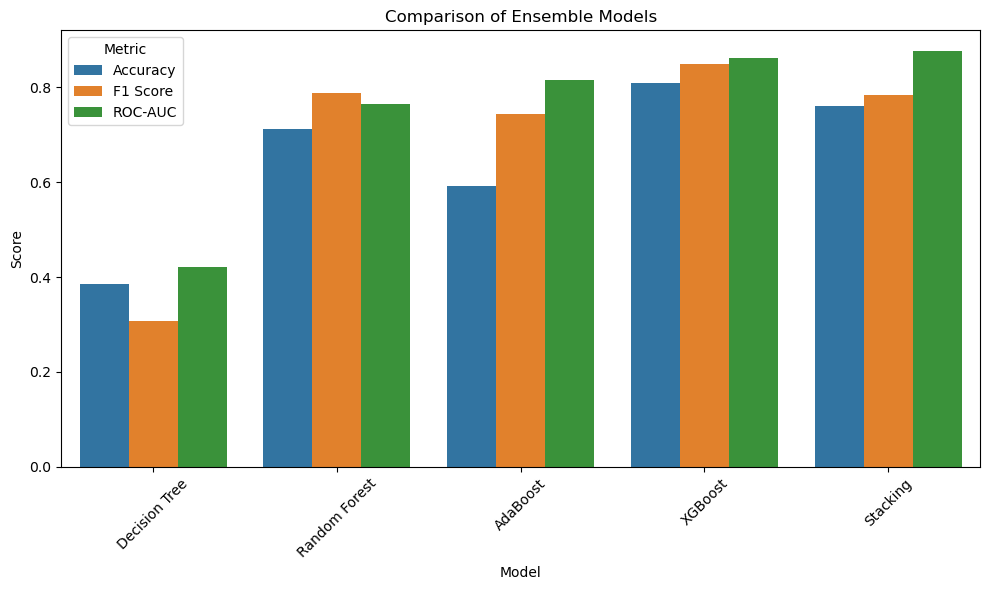

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("heart_disease_uci.csv")

X = df.drop(["id", "dataset", "num"], axis=1)  
y = (df["num"] > 0).astype(int) 

X = pd.get_dummies(X, drop_first=True)

imputer = SimpleImputer(strategy="mean")  
X_imputed = imputer.fit_transform(X)
# Split and Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_test = scaler.transform(X_test)

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    print(f"\n {name} Performance:")
    print(f"Accuracy: {acc:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC Score: {roc:.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return acc, f1, roc


models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Stacking": StackingClassifier(
        estimators=[
            ('lr', LogisticRegression()),
            ('svm', SVC(probability=True)),
            ('rf', RandomForestClassifier(n_estimators=100))
        ],
        final_estimator=LogisticRegression()
    )
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    acc, f1, roc = evaluate_model(model, name)
    results.append({"Model": name, "Accuracy": acc, "F1 Score": f1, "ROC-AUC": roc})


result_df = pd.DataFrame(results)
print("\n Summary of Model Performances:")
print(result_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=result_df.melt(id_vars='Model', var_name='Metric', value_name='Score'), x='Model', y='Score', hue='Metric')
plt.title("Comparison of Ensemble Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()